# xcube CMEMS Data Store

This notebook provides a walk-through demonstrating how to use xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need a python environment with xcube and xcube_cmems plugin. You may do so by executing the following line in your terminal:

`$ conda install -c conda-forge xcube-cmems`

Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/dcs4cop/xcube-cmems.

In [1]:
from xcube_cmems.store import CmemsDataStore
import os

#### Please note: 
In order to access data from CMEMS, you need CMEMS API credentials. If you do not have cmems user yet, you can register for an [account](https://data.marine.copernicus.eu/register). They may be passed as store parameters or exported from environment variables.In case you have not exported them already, you may also set them by uncommenting the cell below and adjusting the content to your access credentials. However, we do not recommend this method!

In [2]:
# os.environ["CMEMS_USERNAME"] = ""
# os.environ["CMEMS_PASSWORD"] = ""

In [3]:
cmems_store =  CmemsDataStore()

### Get all opendap dataset ids for CMEMS API

In [4]:
list(cmems_store.list_data_ids())

['cmems_obs-sst_glo_phy_nrt_l4_P1D-m',
 'cmems_sat-si_bal_conc_nrt_500m_d',
 'cmems_sat-si_bal_thick_nrt_500m_hi',
 'FMI-BAL-SEAICE_THICK-MOSAIC-SAR-NRT-OBS',
 'cmems_obs-si_ant_phy_nrt_l3-1km_P1D',
 'cmems_mod_bal_bgc_my_P1D-m',
 'cmems_mod_bal_bgc_my_P1M-m',
 'cmems_mod_bal_bgc_my_P1Y-m',
 'cmems_mod_glo_bgc_my_0.25_P1D-m',
 'cmems_mod_glo_bgc_my_0.25_P1M-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_mod_arc_phy_my_topaz4_P1D-m',
 'cmems_mod_arc_phy_my_topaz4_P1M',
 'cmems_mod_arc_phy_my_topaz4_P1Y',
 'cmems_mod_bal_wav_anfc_PT1h-i',
 'cmems_mod_nws_phy-bottomt_anfc_7km-2D_P1D-m',
 'cmems_mod_nws_phy-mld_anfc_7km-2D_P1D-m',
 'cmems_mod_nws_phy-s_anfc_7km-3D_P1D-m',
 'cmems_mod_nws_phy-ssh_anfc_7km-2D_P1D-m',
 'cmems_mod_nws_phy-t_anfc_7km-3D_P1D-m',
 'cmems_mod_nws_phy-uv_anfc_7km-3D_P1D-m',
 'dataset-carbon-rep-monthly',
 'dataset-uv-rep-daily',
 'dataset-uv-rep-hourly',
 'dataset-uv-rep-monthly',
 'cmems_mo

We can have a look at which openers are provided by this store.

In [5]:
cmems_store.get_data_opener_ids()

('dataset:zarr:cmems',)

We can get more information about a dataset_id like time_range and bbox

In [6]:
data_des = cmems_store.describe_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE')

In [7]:
data_des.time_range

('2019-03-11', '2023-05-24')

In [8]:
data_des.bbox

(-10.00999975, 47.98999975, 30.00999975, 66.01000025)

We can choose to open_data with different cube parameters. To see the the properties supported by this store, we can use get_open_data_params_schema method 

In [9]:
cmems_store.get_open_data_params_schema('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE','dataset:zarr:cmems')

### Open a dataset without cube params

In [10]:
ds = cmems_store.open_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE','dataset:zarr:cmems')
ds

<xarray.Dataset>
Dimensions:                  (lat: 901, lon: 2001, time: 1533)
Coordinates:
  * lat                      (lat) float32 48.0 48.02 48.04 ... 65.96 65.98 66.0
  * lon                      (lon) float32 -10.0 -9.98 -9.96 ... 29.98 30.0
  * time                     (time) datetime64[ns] 2019-03-11 ... 2023-05-24
Data variables:
    mask                     (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    or_number_of_sst_pixels  (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    quality_level            (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sea_ice_fraction         (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    source_of_sst            (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sses_bias                (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sses_standard_deviation  (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sst_dtime                (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sum_square_sst           (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
    sum_sst                  (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    title:                      Baltic Sea - SST Analysis
    summary:                    DMI Sea Surface Temperature  supercollated le...
    references:                 Høyer, J. L., Le Borgne, P., & Eastwood, S. (...
    institution:                Danish Meteorological Institute, DMI
    history:                    Version 1.0
    ...                         ...
    publisher_name:             GHRSST project office
    publisher_url:              http://www.ghrsst.org
    publisher_email:             ghrsst-po@nceo.ac.uk
    processing_level:           L3S
    cdm_data_type:              grid
    comment:                    IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES ...

In [11]:
ds.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 1533, lat: 901, lon: 2001)>
dask.array<open_dataset-270612adea9a6d36bb6536f8f9966ad8sea_surface_temperature, shape=(1533, 901, 2001), dtype=float32, chunksize=(1, 901, 2001), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 48.0 48.02 48.04 48.06 ... 65.94 65.96 65.98 66.0
  * lon      (lon) float32 -10.0 -9.98 -9.96 -9.94 ... 29.94 29.96 29.98 30.0
  * time     (time) datetime64[ns] 2019-03-11 2019-03-12 ... 2023-05-24
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sea surface foundation temperature
    units:          kelvin
    comment:        Foundation sea surface temperature of the ocean
    source:         OSI-SAF and GHRSST L2P satellite SST products
    valid_min:      -300
    valid_max:      4500

### Open dataset with cube params: single variable and time range

In [12]:
ds = cmems_store.open_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE','dataset:zarr:cmems',variable_names=['sea_surface_temperature'],time_range=('2022-01-01','2022-01-05'))
ds

<xarray.Dataset>
Dimensions:                  (time: 5, lat: 901, lon: 2001)
Coordinates:
  * lat                      (lat) float32 48.0 48.02 48.04 ... 65.96 65.98 66.0
  * lon                      (lon) float32 -10.0 -9.98 -9.96 ... 29.98 30.0
  * time                     (time) datetime64[ns] 2022-01-01 ... 2022-01-05
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 901, 2001), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    title:                      Baltic Sea - SST Analysis
    summary:                    DMI Sea Surface Temperature  supercollated le...
    references:                 Høyer, J. L., Le Borgne, P., & Eastwood, S. (...
    institution:                Danish Meteorological Institute, DMI
    history:                    Version 1.0
    ...                         ...
    publisher_name:             GHRSST project office
    publisher_url:              http://www.ghrsst.org
    publisher_email:             ghrsst-po@nceo.ac.uk
    processing_level:           L3S
    cdm_data_type:              grid
    comment:                    IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES ...

Display the results:

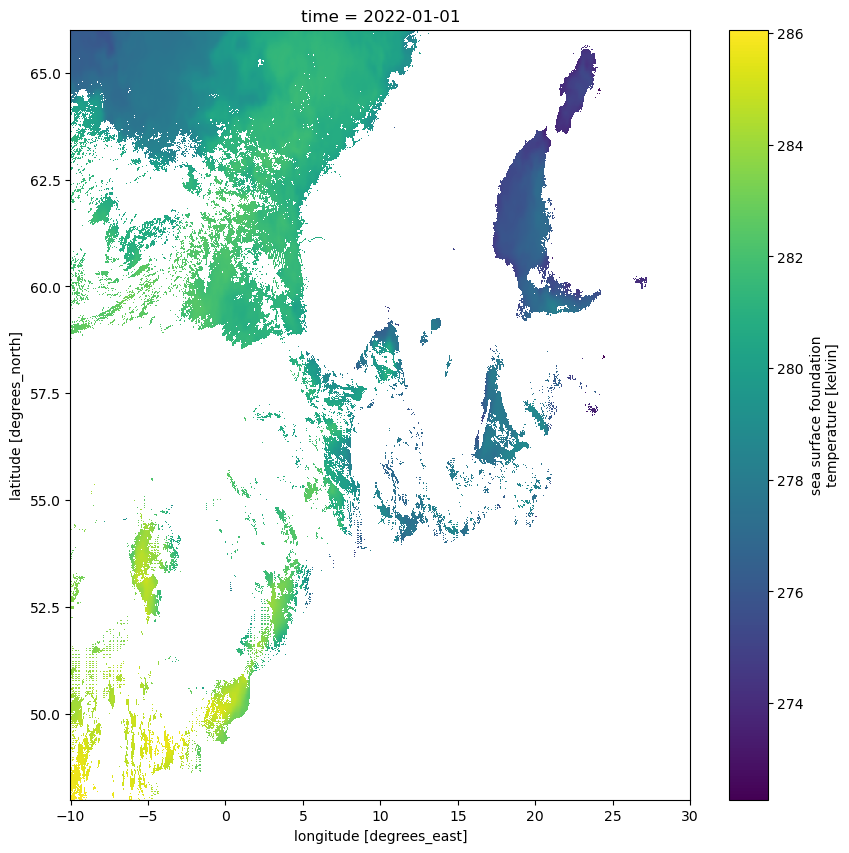

In [13]:
ds.sea_surface_temperature[0].plot(figsize=(10, 10))

### Open a dataset with cube params: Variable_names, time_range and bbox

In [14]:
ds = cmems_store.open_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE','dataset:zarr:cmems',variable_names=['sea_surface_temperature'],time_range=('2022-01-01','2022-01-05'),
                            bbox=[9, 53, 20, 62])
ds

<xarray.Dataset>
Dimensions:                  (time: 5, lat: 451, lon: 551)
Coordinates:
  * lat                      (lat) float32 53.0 53.02 53.04 ... 61.96 61.98 62.0
  * lon                      (lon) float32 9.0 9.02 9.04 ... 19.96 19.98 20.0
  * time                     (time) datetime64[ns] 2022-01-01 ... 2022-01-05
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 451, 551), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    title:                      Baltic Sea - SST Analysis
    summary:                    DMI Sea Surface Temperature  supercollated le...
    references:                 Høyer, J. L., Le Borgne, P., & Eastwood, S. (...
    institution:                Danish Meteorological Institute, DMI
    history:                    Version 1.0
    ...                         ...
    publisher_name:             GHRSST project office
    publisher_url:              http://www.ghrsst.org
    publisher_email:             ghrsst-po@nceo.ac.uk
    processing_level:           L3S
    cdm_data_type:              grid
    comment:                    IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES ...

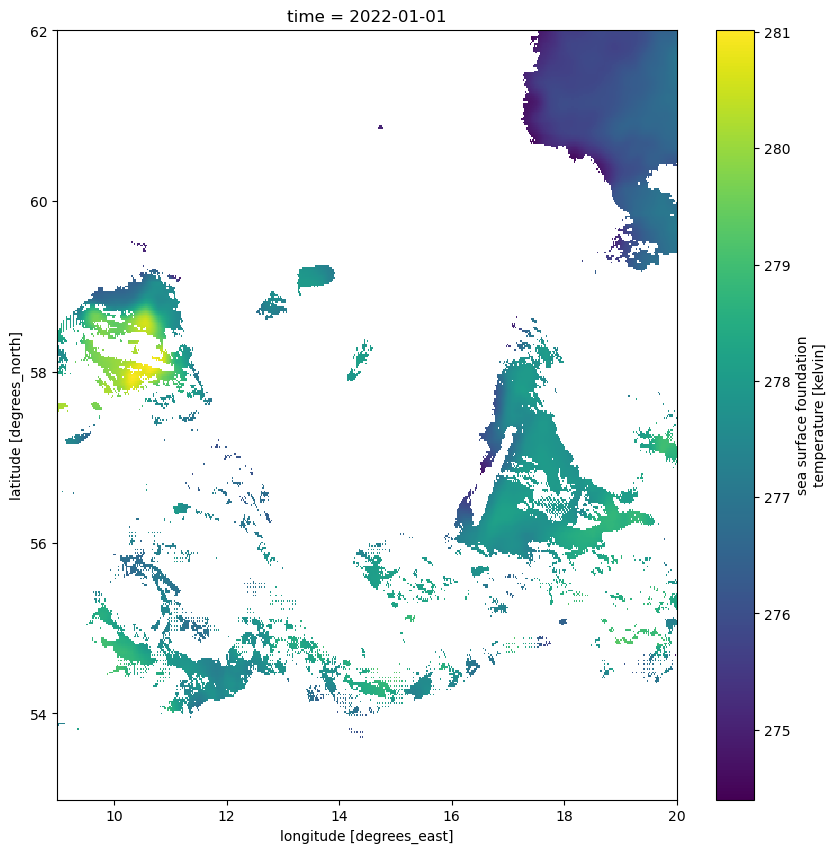

In [15]:
ds.sea_surface_temperature[0].plot(figsize=(10, 10))

In [16]:
ds = cmems_store.open_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE','dataset:zarr:cmems',variable_names=['sea_surface_temperature'],time_range=('2022-01-01','2022-01-02'), bbox=[9, 53, 20, 62])
ds

<xarray.Dataset>
Dimensions:                  (time: 2, lat: 451, lon: 551)
Coordinates:
  * lat                      (lat) float32 53.0 53.02 53.04 ... 61.96 61.98 62.0
  * lon                      (lon) float32 9.0 9.02 9.04 ... 19.96 19.98 20.0
  * time                     (time) datetime64[ns] 2022-01-01 2022-01-02
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 451, 551), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    title:                      Baltic Sea - SST Analysis
    summary:                    DMI Sea Surface Temperature  supercollated le...
    references:                 Høyer, J. L., Le Borgne, P., & Eastwood, S. (...
    institution:                Danish Meteorological Institute, DMI
    history:                    Version 1.0
    ...                         ...
    publisher_name:             GHRSST project office
    publisher_url:              http://www.ghrsst.org
    publisher_email:             ghrsst-po@nceo.ac.uk
    processing_level:           L3S
    cdm_data_type:              grid
    comment:                    IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES ...